<a href="https://colab.research.google.com/github/KavyaNair01/Machine_Learning/blob/main/humana_model_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
for i in range(50):
  if i<10:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-0000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  else:
    tmp=pd.read_csv(f'/content/drive/MyDrive/humana_train_agg.csv/part-000{i}-a6808de1-d981-4148-99ee-d3a76b82da70-c000.csv')
  if i==0:
    df=tmp
  else:
    df=pd.concat([df,tmp],axis=0,ignore_index=True)


df.head()

,id,preventive_visit_gap_ind,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,...,TEX_elig_cnt,TFP_elig_cnt,TRC_(MRP)_elig_cnt,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt
0,1000073.0,0.0,0.0,481.53,0.00,0.142282,0.673468,1.380135,0.237137,11.6,...,NaN,NaN,NaN,NaN,1.0,2.0,NaN,2.0,4.0,NaN
1,1000096.0,0.0,0.0,1017.22,84.62,0.120904,0.785878,1.632209,0.211583,22.4,...,NaN,NaN,1.0,1.0,1.0,NaN,2.0,4.0,NaN,2.0
2,1000113.0,1.0,0.0,758.85,0.00,0.093059,0.645209,0.763084,0.155098,12.9,...,8.0,NaN,NaN,NaN,NaN,28.0,NaN,NaN,36.0,NaN
3,1000240.0,1.0,0.0,377.92,245.94,0.186335,0.745338,0.790316,0.115656,8.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000369.0,1.0,0.0,809.89,72.90,0.080929,0.526039,0.930684,0.222555,15.2,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
feature_cols=list(df.drop(['preventive_visit_gap_ind', 'lang_spoken_cd'],axis=1).columns)
feature_cols

['id',
 'cms_frailty_ind',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
 'atlas_recfacpth14',
 'atlas_ffrpth14',
 'atlas_fsrpth14',
 'atlas_grocpth14',
 'atlas_povertyallagespct',
 'cci_score',
 'fci_score',
 'dcsi_score',
 'cnt_cp_emails_0',
 'cnt_cp_emails_1',
 'cnt_cp_emails_2',
 'cnt_cp_emails_3',
 'cnt_cp_emails_4',
 'cnt_cp_emails_5',
 'cnt_cp_emails_6',
 'cnt_cp_emails_7',
 'cnt_cp_emails_8',
 'cnt_cp_emails_9',
 'cnt_cp_emails_10',
 'cnt_cp_emails_11',
 'cnt_cp_print_0',
 'cnt_cp_print_1',
 'cnt_cp_print_2',
 'cnt_cp_print_3',
 'cnt_cp_print_4',
 'cnt_cp_print_5',
 'cnt_cp_print_6',
 'cnt_cp_print_7',
 'cnt_cp_print_8',
 'cnt_cp_print_9',
 'cnt_cp_print_10',
 'cnt_cp_print_11',
 'cnt_cp_vat_0',
 'cnt_cp_vat_1',
 'cnt_cp_vat_2',
 'cnt_cp_vat_3',
 'cnt_cp_vat_4',
 'cnt_cp_vat_5',
 'cnt_cp_vat_6',
 'cnt_cp_vat_7',
 'cnt_cp_vat_8',
 'cnt_cp_vat_9',
 'cnt_cp_vat_10',
 'cnt_cp_vat_11',
 'cnt_cp_webstatement_0',
 'cnt_cp_webstatement_1',
 'cnt_cp_webstatement_2',
 'cnt_cp_

In [6]:
lst=list(set([x.replace('_comp_cnt', '') for x in feature_cols if x[-9:]=='_comp_cnt']))
for i in lst:
  df[i+'_ratio']=df[i+'_comp_cnt']/df[i+'_elig_cnt']
  feature_cols.append(i+'_ratio')


In [8]:
df.iloc[:,-len(lst):].describe()

,Patient_Experience_ratio,ETA_ratio,ADH_(DIAB)_ratio,ADH_(ACE)_ratio,SWT_ratio,CBP_ratio,CDC_(HbA1c)_ratio,Patient_Safety_ratio,EGR_ratio,FMC_ratio,...,SFT_ratio,CDC_(EYE)_ratio,COA_(MDR)_ratio,ESA_ratio,CDC_(NPH)_ratio,TBC_ratio,TEX_ratio,ART_ratio,BCS_ratio,OMW_ratio
count,671709.000000,598298.000000,247522.000000,655674.000000,638215.000000,711150.000000,203038.000000,956050.000000,479479.000000,86844.000000,...,134845.000000,203047.000000,46089.000000,662915.000000,275681.000000,288350.000000,579286.000000,11043.000000,261913.000000,12931.000000
mean,0.812151,0.942414,0.847366,0.873418,0.794196,0.607397,0.689078,0.853752,0.921497,0.624560,...,0.772276,0.683925,0.677899,0.935454,0.926154,0.419220,0.576908,0.766096,0.723338,0.384825
std,0.162776,0.200291,0.313601,0.279857,0.357647,0.416010,0.424506,0.264260,0.238459,0.439622,...,0.397587,0.430714,0.435420,0.208690,0.231070,0.469546,0.394594,0.423331,0.418738,0.483950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.727273,1.000000,1.000000,1.000000,0.666667,0.000000,0.500000,0.800000,1.000000,0.000000,...,0.666667,0.000000,0.000000,1.000000,1.000000,0.000000,0.200000,1.000000,0.333333,0.000000
50%,0.833333,1.000000,1.000000,1.000000,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.600000,1.000000,1.000000,0.000000
75%,0.925926,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df['preventive_visit_gap_ind'],test_size=0.2, random_state=12345)

In [10]:
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3, random_state=54321)

In [ ]:
#cnt_cp can be 0
#rwjf impute with avg
#rx impute with cost
#Donot impute
#  'dual_eligible_ind',
#  'disabled_ind',
#  'lis_ind',
#  'tenure_band_index',
#  'generic_grouper',
#  'unattributed_provider',
#  'age',
#  'veteran_ind',
#  'pbp_segment_id',
#  'sex_cd_index',
#  'region_index',
# days_since_last_clm

# #Donot impute
# df[['cms_frailty_ind',
#  'cms_tot_ma_payment_amt',
#  'cms_tot_partd_payment_amt',
#  'atlas_recfacpth14',
#  'atlas_ffrpth14',
#  'atlas_fsrpth14',
#  'atlas_grocpth14',
#  'atlas_povertyallagespct',
#  'cci_score',
#  'fci_score',
#  'dcsi_score']].isnull().sum()




,0
cms_frailty_ind,511
cms_tot_ma_payment_amt,19736
cms_tot_partd_payment_amt,19736
atlas_recfacpth14,982
atlas_ffrpth14,982
atlas_fsrpth14,982
atlas_grocpth14,982
atlas_povertyallagespct,982
cci_score,511
fci_score,511


In [11]:
donotimput=['cms_frailty_ind',
 'cms_tot_ma_payment_amt',
 'cms_tot_partd_payment_amt',
 'atlas_recfacpth14',
 'atlas_ffrpth14',
 'atlas_fsrpth14',
 'atlas_grocpth14',
 'atlas_povertyallagespct',
 'cci_score',
 'fci_score',
 'dcsi_score', 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index','days_since_last_clm','lang_spoken_cd',
 'rucc_category',
 'riskarr_downside',
 'riskarr_upside',
 'riskarr_rewards',
 'riskarr_global','channelIndex', 'consec_tenure_month',
 'all_mm_tenure',
 'dual_eligible_ind',
 'disabled_ind',
 'lis_ind',
 'tenure_band_index',
 'generic_grouper',
 'unattributed_provider',
 'age',
 'veteran_ind',
 'pbp_segment_id',
 'sex_cd_index',
 'region_index',
 'race_index', 'nonpar_deduct_pmpm_cost',
 'oontwk_deduct_pmpm_cost',
 'total_deduct_pmpm_cost',
 'rx_overall_deduct_pmpm_cost','id',
 'preventive_visit_gap_ind',
 'days_since_last_login'
 ]
print(donotimput)

['cms_frailty_ind', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'atlas_recfacpth14', 'atlas_ffrpth14', 'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct', 'cci_score', 'fci_score', 'dcsi_score', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'days_since_last_clm', 'lang_spoken_cd', 'rucc_category', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'channelIndex', 'consec_tenure_month', 'all_mm_tenure', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'race_index', 'nonpar_deduct_pmpm_cost', 'oontwk_deduct_pmpm_cost', 'total_deduct_pmpm_cost', 'rx_overall_deduct_pmpm_cost', 'id', 'preventive_visit_gap_ind', 'days_since_last_login']


In [ ]:
df['rwjf_poor_health_pct'].mean()

0.19655987827465848

In [12]:
imput_dict=dict()
for x in [x for x in df.columns if x not in donotimput] :
  if x.startswith('cnt_cp') or x.startswith('nonpar') or x.startswith('oontwk') or x.startswith('total') or x.startswith('bh_rtc') or x.startswith('bh_psyc') or x.startswith('rx') or x.startswith('login') or x.startswith('2021') or x.startswith('2022') or x[-3:] =='cnt' or x[-5:] =='ratio' or x in [ 'Cancers',
 'Cardiovascular_Diseases',
 'Diabetes_Related',
 'Immunological_Disorders',
 'Kidney_and_Liver_Diseases',
 'Mental_Health_Disorders',
 'Miscellaneous',
 'Neurological_Disorders',
 'Respiratory_Diseases',
 'other'] or x in ['annual_wellness',
 'clm_unique_key',
 'podiatrist_visit',
 'pcp_visit',
 'fqhc_visit',
 'cardiologist_visit',
 'telehealth',
 'urgent_care_visit',
 'gastroenterologist_visit',
 'oncolologist_visit',
 'pulmonologist_visit',
 'preventative_visit',
 'nephroloogist_visit',
 'orthopedist_visit',
 'ophthalmologist_visit',
 'humana_paf',
 'optometrist_visit',
 'ihwa',
 'endocrinologist_visit',
 'radiologist_visit',
 'physical_therapist_visit',
 'comp_physical_exam',
 'er_visit',
 'obgyn_visit']:
    imput_dict[x]= 0
  if x.startswith('rwjf') :
    imput_dict[x]= X_train[x].mean()

imput_dict

{'cnt_cp_emails_0': 0,
 'cnt_cp_emails_1': 0,
 'cnt_cp_emails_2': 0,
 'cnt_cp_emails_3': 0,
 'cnt_cp_emails_4': 0,
 'cnt_cp_emails_5': 0,
 'cnt_cp_emails_6': 0,
 'cnt_cp_emails_7': 0,
 'cnt_cp_emails_8': 0,
 'cnt_cp_emails_9': 0,
 'cnt_cp_emails_10': 0,
 'cnt_cp_emails_11': 0,
 'cnt_cp_print_0': 0,
 'cnt_cp_print_1': 0,
 'cnt_cp_print_2': 0,
 'cnt_cp_print_3': 0,
 'cnt_cp_print_4': 0,
 'cnt_cp_print_5': 0,
 'cnt_cp_print_6': 0,
 'cnt_cp_print_7': 0,
 'cnt_cp_print_8': 0,
 'cnt_cp_print_9': 0,
 'cnt_cp_print_10': 0,
 'cnt_cp_print_11': 0,
 'cnt_cp_vat_0': 0,
 'cnt_cp_vat_1': 0,
 'cnt_cp_vat_2': 0,
 'cnt_cp_vat_3': 0,
 'cnt_cp_vat_4': 0,
 'cnt_cp_vat_5': 0,
 'cnt_cp_vat_6': 0,
 'cnt_cp_vat_7': 0,
 'cnt_cp_vat_8': 0,
 'cnt_cp_vat_9': 0,
 'cnt_cp_vat_10': 0,
 'cnt_cp_vat_11': 0,
 'cnt_cp_webstatement_0': 0,
 'cnt_cp_webstatement_1': 0,
 'cnt_cp_webstatement_2': 0,
 'cnt_cp_webstatement_3': 0,
 'cnt_cp_webstatement_4': 0,
 'cnt_cp_webstatement_5': 0,
 'cnt_cp_webstatement_6': 0,
 'cnt_cp_we

In [13]:
imp_df =pd.DataFrame({'impt_cols':imput_dict.keys(),'impt_val':imput_dict.values()})
df_cols=pd.DataFrame({'cols':[ x for x in list(df.columns)if x not in donotimput]})
imp_df=df_cols.merge(imp_df, how='left',right_on='impt_cols', left_on='cols')
list(imp_df[imp_df['impt_cols'].isnull()]['cols'])

[]

In [14]:
X_train.fillna(imput_dict, inplace=True)

In [15]:
X_val.fillna(imput_dict, inplace=True)

In [16]:
X_test.fillna(imput_dict, inplace=True)

In [38]:
param_grid={'n_estimators':[ 1000,1100,1200,1250,1300],
              'max_depth':[ 8, 9,10,11,12],
              # 'learning_rate':[0.125, 0.1,0.075, 0.05,  0.025],
              'reg_lambda':[100,200,300,400,500,600],
              'reg_alpha':[0.5,0.6,0.7,0.8] ,
             'colsample_bylevel':[0.6,0.7,0.8,0.9],
              'min_child_weight':[10,30,50,70,100]
           }

In [ ]:
fit_params = {
    "eval_metric": "roc_auc",
    "eval_set": [(X_val, y_val)],
    "early_stopping_rounds": 50
}

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [18]:
import xgboost as xgb

In [147]:
y_train.isnull().sum(), y_val.isnull().sum(), y_test.isnull().sum()

(0, 0, 0)

In [ ]:
print((X_train.shape,y_train.shape), (X_val.shape,y_val.shape), (X_test.shape,y_test.shape))

((855626, 356), (855626,)) ((366697, 356), (366697,)) ((305581, 356), (305581,))


In [39]:
xgbc=xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.3, colsample_bytree=0.9, device = "cuda", eval_metric='auc', early_stopping_rounds=50 )
clf=RandomizedSearchCV(xgbc,
                   param_distributions=param_grid,  n_iter=100, scoring='roc_auc', cv=3, verbose=3,error_score='raise',refit=True, random_state=1111)
clf.fit(X_train,y_train,eval_set=[(X_val, y_val)])

Streaming output truncated to the last 5000 lines.
[236]	validation_0-auc:0.76428
[237]	validation_0-auc:0.76426
[238]	validation_0-auc:0.76426
[239]	validation_0-auc:0.76426
[240]	validation_0-auc:0.76425
[241]	validation_0-auc:0.76421
[242]	validation_0-auc:0.76419
[243]	validation_0-auc:0.76420
[244]	validation_0-auc:0.76419
[245]	validation_0-auc:0.76420
[246]	validation_0-auc:0.76421
[247]	validation_0-auc:0.76421
[248]	validation_0-auc:0.76420
[249]	validation_0-auc:0.76420
[250]	validation_0-auc:0.76420
[251]	validation_0-auc:0.76421
[252]	validation_0-auc:0.76423
[253]	validation_0-auc:0.76425
[254]	validation_0-auc:0.76428
[255]	validation_0-auc:0.76426
[256]	validation_0-auc:0.76427
[257]	validation_0-auc:0.76427
[258]	validation_0-auc:0.76426
[259]	validation_0-auc:0.76426
[260]	validation_0-auc:0.76430
[261]	validation_0-auc:0.76430
[262]	validation_0-auc:0.76430
[263]	validation_0-auc:0.76431
[264]	validation_0-auc:0.76431
[265]	validation_0-auc:0.76431
[266]	validation_0-

RandomizedSearchCV(cv=3, error_score='raise',
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.9, device='cuda',
                                           early_stopping_rounds=50,
                                           enable_categorical=False,
                                           eval_metric='auc',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraint...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100,
                   param_distributions={'colsample_bylevel': [0.6, 0.7, 0.8,
                                                              0.9],
                                        'max_depth': [8, 9, 10, 11, 12],
                                        'min_child_weight': [10, 30, 50, 70,
                                                             100],
                                        'n_estimators': [1000, 1100, 1200, 1250,
                                                         1300],
                                        'reg_alpha': [0.5, 0.6, 0.7, 0.8],
                                        'reg_lambda': [100, 200, 300, 400, 500,
                                                       600]},
                   random_state=1111, scoring='roc_auc', verbose=3)

In [40]:
pd.DataFrame(clf.cv_results_).to_csv('/content/drive/MyDrive/humana_train_agg.csv/train_cv_results_ratio.csv')

In [41]:
pd.DataFrame({'params':clf.best_params_.keys(),'values':clf.best_params_.values()}).to_csv('/content/drive/MyDrive/humana_train_agg.csv/train_cv_bestparams_ratio.csv')

In [ ]:
import pickle

with open('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best_ratio.pkl','wb') as f:
    pickle.dump(clf.best_estimator_,f)

In [42]:
clf.best_estimator_.save_model('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best_ratio.json')

In [80]:
single_model = xgb.XGBClassifier()
single_model.load_model('/content/drive/MyDrive/humana_train_agg.csv/xgbc_best_ratio.json')

In [85]:
clf.best_estimator_.feature_importances_

array([0.00083352, 0.00067318, 0.00168517, 0.00191405, 0.0015113 ,
       0.00154509, 0.00154927, 0.00195026, 0.0019448 , 0.00301217,
       0.00215115, 0.00175344, 0.00152605, 0.00081286, 0.00136895,
       0.00113598, 0.00094978, 0.00087883, 0.00106155, 0.0010184 ,
       0.00111844, 0.00097861, 0.00122549, 0.00115326, 0.00101758,
       0.00101974, 0.00176759, 0.00355481, 0.00121238, 0.00114277,
       0.00094949, 0.00115435, 0.00092625, 0.00080043, 0.00117361,
       0.00137291, 0.00108862, 0.00187771, 0.00142456, 0.00081878,
       0.00092244, 0.00094594, 0.0010334 , 0.0010987 , 0.00076579,
       0.00083447, 0.00088783, 0.00119904, 0.00104474, 0.00104901,
       0.00095369, 0.00104103, 0.00182253, 0.0011255 , 0.00099745,
       0.00105087, 0.00092782, 0.0010451 , 0.00103199, 0.00104005,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00105871, 0.00263943, 0.00095

In [81]:
feature_cols.remove('id')
#feature_cols

ValueError: list.remove(x): x not in list

In [21]:
X_train['predicted']=single_model.predict(X_train[feature_cols])
X_val['predicted']=single_model.predict(X_val[feature_cols])
X_test['predicted']=single_model.predict(X_test[feature_cols])

ValueError: feature_names mismatch: ['cms_frailty_ind', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'atlas_recfacpth14', 'atlas_ffrpth14', 'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct', 'cci_score', 'fci_score', 'dcsi_score', 'cnt_cp_emails_0', 'cnt_cp_emails_1', 'cnt_cp_emails_2', 'cnt_cp_emails_3', 'cnt_cp_emails_4', 'cnt_cp_emails_5', 'cnt_cp_emails_6', 'cnt_cp_emails_7', 'cnt_cp_emails_8', 'cnt_cp_emails_9', 'cnt_cp_emails_10', 'cnt_cp_emails_11', 'cnt_cp_print_0', 'cnt_cp_print_1', 'cnt_cp_print_2', 'cnt_cp_print_3', 'cnt_cp_print_4', 'cnt_cp_print_5', 'cnt_cp_print_6', 'cnt_cp_print_7', 'cnt_cp_print_8', 'cnt_cp_print_9', 'cnt_cp_print_10', 'cnt_cp_print_11', 'cnt_cp_vat_0', 'cnt_cp_vat_1', 'cnt_cp_vat_2', 'cnt_cp_vat_3', 'cnt_cp_vat_4', 'cnt_cp_vat_5', 'cnt_cp_vat_6', 'cnt_cp_vat_7', 'cnt_cp_vat_8', 'cnt_cp_vat_9', 'cnt_cp_vat_10', 'cnt_cp_vat_11', 'cnt_cp_webstatement_0', 'cnt_cp_webstatement_1', 'cnt_cp_webstatement_2', 'cnt_cp_webstatement_3', 'cnt_cp_webstatement_4', 'cnt_cp_webstatement_5', 'cnt_cp_webstatement_6', 'cnt_cp_webstatement_7', 'cnt_cp_webstatement_8', 'cnt_cp_webstatement_9', 'cnt_cp_webstatement_10', 'cnt_cp_webstatement_11', 'cnt_cp_livecall_0', 'cnt_cp_livecall_1', 'cnt_cp_livecall_2', 'cnt_cp_livecall_3', 'cnt_cp_livecall_4', 'cnt_cp_livecall_5', 'cnt_cp_livecall_6', 'cnt_cp_livecall_7', 'cnt_cp_livecall_8', 'cnt_cp_livecall_9', 'cnt_cp_livecall_10', 'cnt_cp_livecall_11', 'cnt_cp_emails_pmpm_ct', 'cnt_cp_print_pmpm_ct', 'cnt_cp_vat_pmpm_ct', 'cnt_cp_webstatement_pmpm_ct', 'cnt_cp_livecall_pmpm_ct', 'nonpar_clm_ct_pmpm', 'nonpar_allowed_pmpm_cost', 'nonpar_net_paid_pmpm_cost', 'nonpar_cob_paid_pmpm_cost', 'nonpar_coins_pmpm_cost', 'nonpar_copay_pmpm_cost', 'nonpar_deduct_pmpm_cost', 'nonpar_mbr_resp_pmpm_cost', 'nonpar_ds_clm', 'oontwk_clm_ct_pmpm', 'oontwk_allowed_pmpm_cost', 'oontwk_net_paid_pmpm_cost', 'oontwk_cob_paid_pmpm_cost', 'oontwk_coins_pmpm_cost', 'oontwk_copay_pmpm_cost', 'oontwk_deduct_pmpm_cost', 'oontwk_mbr_resp_pmpm_cost', 'oontwk_ds_clm', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'total_cob_paid_pmpm_cost', 'total_coins_pmpm_cost', 'total_copay_pmpm_cost', 'total_deduct_pmpm_cost', 'total_mbr_resp_pmpm_cost', 'days_since_last_clm', 'bh_rtc_admit_ct_pmpm', 'bh_rtc_admit_days_pmpm', 'bh_psyc_visit_ct_pmpm', 'total_ip_acute_admit_days_pmpm', 'total_ip_ltach_admit_days_pmpm', 'total_ip_maternity_admit_days_pmpm', 'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_days_pmpm', 'total_ip_snf_admit_days_pmpm', 'lang_spoken_cd', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'rucc_category', 'rx_overall_pmpm_cost', 'rx_overall_net_paid_pmpm_cost', 'rx_overall_coins_pmpm_cost', 'rx_overall_copay_pmpm_cost', 'rx_overall_deduct_pmpm_cost', 'rx_overall_mbr_resp_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct', 'rx_overall_pmpm_ct', 'rx_tier_1_pmpm_ct', 'rx_tier_2_pmpm_ct', 'rx_tier_3_pmpm_ct', 'rx_tier_4_pmpm_ct', 'rx_days_since_last_script', 'rx_pharmacies_pmpm_ct', 'rx_perphy_pmpm_ct', 'channelIndex', 'rwjf_premature_death_rate', 'rwjf_poor_health_pct', 'rwjf_uninsured_adults_pct', 'rwjf_pcp_rate', 'rwjf_preventable_ip_rate', 'rwjf_adult_smoking_pct', 'rwjf_adult_obesity_pct', 'rwjf_teen_births_rate', 'rwjf_homicides_rate', 'rwjf_high_school_pct', 'rwjf_unemploy_pct', 'rwjf_child_poverty_pct', 'rwjf_poor_phy_hlth_days', 'rwjf_low_birthweight_pct', 'rwjf_mv_deaths_rate', 'rwjf_poor_men_hlth_days', 'rwjf_violent_crime_rate', 'rwjf_income_inequ_ratio', 'rwjf_std_infect_rate', 'rwjf_alcoholic_pct', 'rwjf_mammography_pct', 'rwjf_population', 'rwjf_age_lt_18_pct', 'rwjf_age_gt_65_pct', 'rwjf_african_race_pct', 'rwjf_native_race_pct', 'rwjf_hispanic_pct', 'rwjf_female_pct', 'rwjf_rural_pct', 'rwjf_non_english_pct', 'rwjf_diabetes_pct', 'rwjf_hiv_rate', 'rwjf_men_hlth_prov_ratio', 'rwjf_median_house_income', 'rwjf_child_free_lunch_pct', 'rwjf_drive_alone_pct', 'rwjf_some_college_pct', 'rwjf_inactivity_pct', 'rwjf_hawaiian_race_pct', 'rwjf_asian_race_pct', 'rwjf_single_parent_pct', 'rwjf_limit_hlthy_food_pct', 'rwjf_uninsured_pct', 'rwjf_dentists_ratio', 'rwjf_uninsured_child_pct', 'rwjf_drinkwater_violate_ind', 'rwjf_air_pollute_density', 'rwjf_white_race_pct', 'rwjf_premature_mortality', 'rwjf_child_mortality', 'rwjf_infant_mortality', 'rwjf_other_pcp', 'rwjf_exercise_access_pct', 'rwjf_food_env_inx', 'rwjf_dui_deaths_pct', 'rwjf_injury_deaths_rate', 'rwjf_severe_housing_pct', 'rwjf_long_commute_alone_pct', 'rwjf_drug_overdose_deaths_rate', 'rwjf_food_insecurity_pct', 'rwjf_social_associate_rate', 'rwjf_resident_seg_black_inx', 'rwjf_resident_seg_nonwhite_inx', 'rwjf_insufficient_sleep_pct', 'rwjf_physical_distress_pct', 'rwjf_mental_distress_pct', 'rwjf_life_expectancy', 'rwjf_firearm_fatalities_rate', 'rwjf_disconnect_youth_pct', 'rwjf_home_ownership_pct', 'rwjf_housing_cost_burden_pct', 'rwjf_flu_vax', 'rwjf_suicides_rate', 'rwjf_broadband_access', 'rwjf_diabetes_monitor_pct', 'rwjf_healthcare_cost', 'rwjf_drug_deaths_modl_rate', 'days_since_last_login', 'login_pmpm_ct', 'login_count_0', 'login_count_1', 'login_count_2', 'login_count_3', 'login_count_4', 'login_count_5', 'login_count_6', 'login_count_7', 'login_count_8', 'login_count_9', 'login_count_10', 'login_count_11', 'consec_tenure_month', 'all_mm_tenure', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'race_index', 'annual_wellness', 'clm_unique_key', 'podiatrist_visit', 'pcp_visit', 'fqhc_visit', 'cardiologist_visit', 'telehealth', 'urgent_care_visit', 'gastroenterologist_visit', 'oncolologist_visit', 'pulmonologist_visit', 'preventative_visit', 'nephroloogist_visit', 'orthopedist_visit', 'ophthalmologist_visit', 'humana_paf', 'optometrist_visit', 'ihwa', 'endocrinologist_visit', 'radiologist_visit', 'physical_therapist_visit', 'comp_physical_exam', 'er_visit', 'obgyn_visit', 'Cancers', 'Cardiovascular_Diseases', 'Diabetes_Related', 'Immunological_Disorders', 'Kidney_and_Liver_Diseases', 'Mental_Health_Disorders', 'Miscellaneous', 'Neurological_Disorders', 'Respiratory_Diseases', 'other', 'ABA_comp_cnt', 'ADH_(ACE)_comp_cnt', 'ADH_(DIAB)_comp_cnt', 'ADH_(STATIN)_comp_cnt', 'ART_comp_cnt', 'ASV_comp_cnt', 'BCS_comp_cnt', 'CBP_comp_cnt', 'CDC_(EYE)_comp_cnt', 'CDC_(HbA1c)_comp_cnt', 'CDC_(NPH)_comp_cnt', 'COA_(FSA)_comp_cnt', 'COA_(MDR)_comp_cnt', 'COA_(PNS)_comp_cnt', 'COL_comp_cnt', 'COL_(45-50)_comp_cnt', 'EED_comp_cnt', 'EGR_comp_cnt', 'ESA_comp_cnt', 'ETA_comp_cnt', 'FMC_comp_cnt', 'HBD_comp_cnt', 'KED_comp_cnt', 'MDR_comp_cnt', 'MRP_comp_cnt', 'OMW_comp_cnt', 'PCR_comp_cnt', 'RXC_comp_cnt', 'SBT_comp_cnt', 'SFT_comp_cnt', 'SPC_STATIN_comp_cnt', 'SUPD_comp_cnt', 'SWT_comp_cnt', 'TBC_comp_cnt', 'TEX_comp_cnt', 'TFP_comp_cnt', 'TRC_(MRP)_comp_cnt', 'TRC_(PED)_comp_cnt', 'ABA_elig_cnt', 'ADH_(ACE)_elig_cnt', 'ADH_(DIAB)_elig_cnt', 'ADH_(STATIN)_elig_cnt', 'ART_elig_cnt', 'ASV_elig_cnt', 'BCS_elig_cnt', 'CBP_elig_cnt', 'CDC_(EYE)_elig_cnt', 'CDC_(HbA1c)_elig_cnt', 'CDC_(NPH)_elig_cnt', 'COA_(FSA)_elig_cnt', 'COA_(MDR)_elig_cnt', 'COA_(PNS)_elig_cnt', 'COL_elig_cnt', 'COL_(45-50)_elig_cnt', 'EED_elig_cnt', 'EGR_elig_cnt', 'ESA_elig_cnt', 'ETA_elig_cnt', 'FMC_elig_cnt', 'HBD_elig_cnt', 'KED_elig_cnt', 'MDR_elig_cnt', 'MRP_elig_cnt', 'OMW_elig_cnt', 'PCR_elig_cnt', 'RXC_elig_cnt', 'SBT_elig_cnt', 'SFT_elig_cnt', 'SPC_STATIN_elig_cnt', 'SUPD_elig_cnt', 'SWT_elig_cnt', 'TBC_elig_cnt', 'TEX_elig_cnt', 'TFP_elig_cnt', 'TRC_(MRP)_elig_cnt', 'TRC_(PED)_elig_cnt', 'HEDIS_comp_cnt', 'Patient_Experience_comp_cnt', 'Patient_Safety_comp_cnt', 'HEDIS_elig_cnt', 'Patient_Experience_elig_cnt', 'Patient_Safety_elig_cnt'] ['cms_frailty_ind', 'cms_tot_ma_payment_amt', 'cms_tot_partd_payment_amt', 'atlas_recfacpth14', 'atlas_ffrpth14', 'atlas_fsrpth14', 'atlas_grocpth14', 'atlas_povertyallagespct', 'cci_score', 'fci_score', 'dcsi_score', 'cnt_cp_emails_0', 'cnt_cp_emails_1', 'cnt_cp_emails_2', 'cnt_cp_emails_3', 'cnt_cp_emails_4', 'cnt_cp_emails_5', 'cnt_cp_emails_6', 'cnt_cp_emails_7', 'cnt_cp_emails_8', 'cnt_cp_emails_9', 'cnt_cp_emails_10', 'cnt_cp_emails_11', 'cnt_cp_print_0', 'cnt_cp_print_1', 'cnt_cp_print_2', 'cnt_cp_print_3', 'cnt_cp_print_4', 'cnt_cp_print_5', 'cnt_cp_print_6', 'cnt_cp_print_7', 'cnt_cp_print_8', 'cnt_cp_print_9', 'cnt_cp_print_10', 'cnt_cp_print_11', 'cnt_cp_vat_0', 'cnt_cp_vat_1', 'cnt_cp_vat_2', 'cnt_cp_vat_3', 'cnt_cp_vat_4', 'cnt_cp_vat_5', 'cnt_cp_vat_6', 'cnt_cp_vat_7', 'cnt_cp_vat_8', 'cnt_cp_vat_9', 'cnt_cp_vat_10', 'cnt_cp_vat_11', 'cnt_cp_webstatement_0', 'cnt_cp_webstatement_1', 'cnt_cp_webstatement_2', 'cnt_cp_webstatement_3', 'cnt_cp_webstatement_4', 'cnt_cp_webstatement_5', 'cnt_cp_webstatement_6', 'cnt_cp_webstatement_7', 'cnt_cp_webstatement_8', 'cnt_cp_webstatement_9', 'cnt_cp_webstatement_10', 'cnt_cp_webstatement_11', 'cnt_cp_livecall_0', 'cnt_cp_livecall_1', 'cnt_cp_livecall_2', 'cnt_cp_livecall_3', 'cnt_cp_livecall_4', 'cnt_cp_livecall_5', 'cnt_cp_livecall_6', 'cnt_cp_livecall_7', 'cnt_cp_livecall_8', 'cnt_cp_livecall_9', 'cnt_cp_livecall_10', 'cnt_cp_livecall_11', 'cnt_cp_emails_pmpm_ct', 'cnt_cp_print_pmpm_ct', 'cnt_cp_vat_pmpm_ct', 'cnt_cp_webstatement_pmpm_ct', 'cnt_cp_livecall_pmpm_ct', 'nonpar_clm_ct_pmpm', 'nonpar_allowed_pmpm_cost', 'nonpar_net_paid_pmpm_cost', 'nonpar_cob_paid_pmpm_cost', 'nonpar_coins_pmpm_cost', 'nonpar_copay_pmpm_cost', 'nonpar_deduct_pmpm_cost', 'nonpar_mbr_resp_pmpm_cost', 'nonpar_ds_clm', 'oontwk_clm_ct_pmpm', 'oontwk_allowed_pmpm_cost', 'oontwk_net_paid_pmpm_cost', 'oontwk_cob_paid_pmpm_cost', 'oontwk_coins_pmpm_cost', 'oontwk_copay_pmpm_cost', 'oontwk_deduct_pmpm_cost', 'oontwk_mbr_resp_pmpm_cost', 'oontwk_ds_clm', 'total_allowed_pmpm_cost', 'total_net_paid_pmpm_cost', 'total_cob_paid_pmpm_cost', 'total_coins_pmpm_cost', 'total_copay_pmpm_cost', 'total_deduct_pmpm_cost', 'total_mbr_resp_pmpm_cost', 'days_since_last_clm', 'bh_rtc_admit_ct_pmpm', 'bh_rtc_admit_days_pmpm', 'bh_psyc_visit_ct_pmpm', 'total_ip_acute_admit_days_pmpm', 'total_ip_ltach_admit_days_pmpm', 'total_ip_maternity_admit_days_pmpm', 'total_ip_mhsa_admit_days_pmpm', 'total_ip_rehab_admit_days_pmpm', 'total_ip_snf_admit_days_pmpm', 'riskarr_downside', 'riskarr_upside', 'riskarr_rewards', 'riskarr_global', 'rucc_category', 'rx_overall_pmpm_cost', 'rx_overall_net_paid_pmpm_cost', 'rx_overall_coins_pmpm_cost', 'rx_overall_copay_pmpm_cost', 'rx_overall_deduct_pmpm_cost', 'rx_overall_mbr_resp_pmpm_cost', 'rx_overall_gpi_pmpm_ct', 'rx_overall_dist_gpi6_pmpm_ct', 'rx_overall_pmpm_ct', 'rx_tier_1_pmpm_ct', 'rx_tier_2_pmpm_ct', 'rx_tier_3_pmpm_ct', 'rx_tier_4_pmpm_ct', 'rx_days_since_last_script', 'rx_pharmacies_pmpm_ct', 'rx_perphy_pmpm_ct', 'channelIndex', 'rwjf_premature_death_rate', 'rwjf_poor_health_pct', 'rwjf_uninsured_adults_pct', 'rwjf_pcp_rate', 'rwjf_preventable_ip_rate', 'rwjf_adult_smoking_pct', 'rwjf_adult_obesity_pct', 'rwjf_teen_births_rate', 'rwjf_homicides_rate', 'rwjf_high_school_pct', 'rwjf_unemploy_pct', 'rwjf_child_poverty_pct', 'rwjf_poor_phy_hlth_days', 'rwjf_low_birthweight_pct', 'rwjf_mv_deaths_rate', 'rwjf_poor_men_hlth_days', 'rwjf_violent_crime_rate', 'rwjf_income_inequ_ratio', 'rwjf_std_infect_rate', 'rwjf_alcoholic_pct', 'rwjf_mammography_pct', 'rwjf_population', 'rwjf_age_lt_18_pct', 'rwjf_age_gt_65_pct', 'rwjf_african_race_pct', 'rwjf_native_race_pct', 'rwjf_hispanic_pct', 'rwjf_female_pct', 'rwjf_rural_pct', 'rwjf_non_english_pct', 'rwjf_diabetes_pct', 'rwjf_hiv_rate', 'rwjf_men_hlth_prov_ratio', 'rwjf_median_house_income', 'rwjf_child_free_lunch_pct', 'rwjf_drive_alone_pct', 'rwjf_some_college_pct', 'rwjf_inactivity_pct', 'rwjf_hawaiian_race_pct', 'rwjf_asian_race_pct', 'rwjf_single_parent_pct', 'rwjf_limit_hlthy_food_pct', 'rwjf_uninsured_pct', 'rwjf_dentists_ratio', 'rwjf_uninsured_child_pct', 'rwjf_drinkwater_violate_ind', 'rwjf_air_pollute_density', 'rwjf_white_race_pct', 'rwjf_premature_mortality', 'rwjf_child_mortality', 'rwjf_infant_mortality', 'rwjf_other_pcp', 'rwjf_exercise_access_pct', 'rwjf_food_env_inx', 'rwjf_dui_deaths_pct', 'rwjf_injury_deaths_rate', 'rwjf_severe_housing_pct', 'rwjf_long_commute_alone_pct', 'rwjf_drug_overdose_deaths_rate', 'rwjf_food_insecurity_pct', 'rwjf_social_associate_rate', 'rwjf_resident_seg_black_inx', 'rwjf_resident_seg_nonwhite_inx', 'rwjf_insufficient_sleep_pct', 'rwjf_physical_distress_pct', 'rwjf_mental_distress_pct', 'rwjf_life_expectancy', 'rwjf_firearm_fatalities_rate', 'rwjf_disconnect_youth_pct', 'rwjf_home_ownership_pct', 'rwjf_housing_cost_burden_pct', 'rwjf_flu_vax', 'rwjf_suicides_rate', 'rwjf_broadband_access', 'rwjf_diabetes_monitor_pct', 'rwjf_healthcare_cost', 'rwjf_drug_deaths_modl_rate', 'days_since_last_login', 'login_pmpm_ct', 'login_count_0', 'login_count_1', 'login_count_2', 'login_count_3', 'login_count_4', 'login_count_5', 'login_count_6', 'login_count_7', 'login_count_8', 'login_count_9', 'login_count_10', 'login_count_11', 'consec_tenure_month', 'all_mm_tenure', 'dual_eligible_ind', 'disabled_ind', 'lis_ind', 'tenure_band_index', 'generic_grouper', 'unattributed_provider', 'age', 'veteran_ind', 'pbp_segment_id', 'sex_cd_index', 'region_index', 'race_index', 'annual_wellness', 'clm_unique_key', 'podiatrist_visit', 'pcp_visit', 'fqhc_visit', 'cardiologist_visit', 'telehealth', 'urgent_care_visit', 'gastroenterologist_visit', 'oncolologist_visit', 'pulmonologist_visit', 'preventative_visit', 'nephroloogist_visit', 'orthopedist_visit', 'ophthalmologist_visit', 'humana_paf', 'optometrist_visit', 'ihwa', 'endocrinologist_visit', 'radiologist_visit', 'physical_therapist_visit', 'comp_physical_exam', 'er_visit', 'obgyn_visit', 'Cancers', 'Cardiovascular_Diseases', 'Diabetes_Related', 'Immunological_Disorders', 'Kidney_and_Liver_Diseases', 'Mental_Health_Disorders', 'Miscellaneous', 'Neurological_Disorders', 'Respiratory_Diseases', 'other', 'ABA_comp_cnt', 'ADH_(ACE)_comp_cnt', 'ADH_(DIAB)_comp_cnt', 'ADH_(STATIN)_comp_cnt', 'ART_comp_cnt', 'ASV_comp_cnt', 'BCS_comp_cnt', 'CBP_comp_cnt', 'CDC_(EYE)_comp_cnt', 'CDC_(HbA1c)_comp_cnt', 'CDC_(NPH)_comp_cnt', 'COA_(FSA)_comp_cnt', 'COA_(MDR)_comp_cnt', 'COA_(PNS)_comp_cnt', 'COL_comp_cnt', 'COL_(45-50)_comp_cnt', 'EED_comp_cnt', 'EGR_comp_cnt', 'ESA_comp_cnt', 'ETA_comp_cnt', 'FMC_comp_cnt', 'HBD_comp_cnt', 'KED_comp_cnt', 'MDR_comp_cnt', 'MRP_comp_cnt', 'OMW_comp_cnt', 'PCR_comp_cnt', 'RXC_comp_cnt', 'SBT_comp_cnt', 'SFT_comp_cnt', 'SPC_STATIN_comp_cnt', 'SUPD_comp_cnt', 'SWT_comp_cnt', 'TBC_comp_cnt', 'TEX_comp_cnt', 'TFP_comp_cnt', 'TRC_(MRP)_comp_cnt', 'TRC_(PED)_comp_cnt', 'ABA_elig_cnt', 'ADH_(ACE)_elig_cnt', 'ADH_(DIAB)_elig_cnt', 'ADH_(STATIN)_elig_cnt', 'ART_elig_cnt', 'ASV_elig_cnt', 'BCS_elig_cnt', 'CBP_elig_cnt', 'CDC_(EYE)_elig_cnt', 'CDC_(HbA1c)_elig_cnt', 'CDC_(NPH)_elig_cnt', 'COA_(FSA)_elig_cnt', 'COA_(MDR)_elig_cnt', 'COA_(PNS)_elig_cnt', 'COL_elig_cnt', 'COL_(45-50)_elig_cnt', 'EED_elig_cnt', 'EGR_elig_cnt', 'ESA_elig_cnt', 'ETA_elig_cnt', 'FMC_elig_cnt', 'HBD_elig_cnt', 'KED_elig_cnt', 'MDR_elig_cnt', 'MRP_elig_cnt', 'OMW_elig_cnt', 'PCR_elig_cnt', 'RXC_elig_cnt', 'SBT_elig_cnt', 'SFT_elig_cnt', 'SPC_STATIN_elig_cnt', 'SUPD_elig_cnt', 'SWT_elig_cnt', 'TBC_elig_cnt', 'TEX_elig_cnt', 'TFP_elig_cnt', 'TRC_(MRP)_elig_cnt', 'TRC_(PED)_elig_cnt', 'HEDIS_comp_cnt', 'Patient_Experience_comp_cnt', 'Patient_Safety_comp_cnt', 'HEDIS_elig_cnt', 'Patient_Experience_elig_cnt', 'Patient_Safety_elig_cnt', 'Patient_Experience_ratio', 'ETA_ratio', 'ADH_(DIAB)_ratio', 'ADH_(ACE)_ratio', 'SWT_ratio', 'CBP_ratio', 'CDC_(HbA1c)_ratio', 'Patient_Safety_ratio', 'EGR_ratio', 'FMC_ratio', 'MRP_ratio', 'EED_ratio', 'TFP_ratio', 'ABA_ratio', 'SPC_STATIN_ratio', 'COA_(PNS)_ratio', 'RXC_ratio', 'SUPD_ratio', 'ADH_(STATIN)_ratio', 'SBT_ratio', 'KED_ratio', 'COL_(45-50)_ratio', 'ASV_ratio', 'TRC_(MRP)_ratio', 'HEDIS_ratio', 'COL_ratio', 'TRC_(PED)_ratio', 'COA_(FSA)_ratio', 'HBD_ratio', 'MDR_ratio', 'PCR_ratio', 'SFT_ratio', 'CDC_(EYE)_ratio', 'COA_(MDR)_ratio', 'ESA_ratio', 'CDC_(NPH)_ratio', 'TBC_ratio', 'TEX_ratio', 'ART_ratio', 'BCS_ratio', 'OMW_ratio']
expected lang_spoken_cd in input data
training data did not have the following fields: CDC_(EYE)_ratio, CDC_(NPH)_ratio, TEX_ratio, HEDIS_ratio, COA_(MDR)_ratio, KED_ratio, MDR_ratio, EED_ratio, COL_(45-50)_ratio, ASV_ratio, COA_(PNS)_ratio, SUPD_ratio, RXC_ratio, TBC_ratio, HBD_ratio, COA_(FSA)_ratio, TRC_(MRP)_ratio, PCR_ratio, SFT_ratio, ART_ratio, CBP_ratio, FMC_ratio, BCS_ratio, CDC_(HbA1c)_ratio, EGR_ratio, ETA_ratio, ABA_ratio, TRC_(PED)_ratio, ADH_(ACE)_ratio, ADH_(DIAB)_ratio, SBT_ratio, ADH_(STATIN)_ratio, ESA_ratio, TFP_ratio, Patient_Safety_ratio, OMW_ratio, COL_ratio, SWT_ratio, Patient_Experience_ratio, MRP_ratio, SPC_STATIN_ratio

In [20]:
X_train['predicted_score']=single_model.predict_proba(X_train[feature_cols])[:,1][:]
X_val['predicted_score']=single_model.predict_proba(X_val[feature_cols])[:,1][:]
X_test['predicted_score']=single_model.predict_proba(X_test[feature_cols])[:,1][:]

In [21]:
train_preds=pd.DataFrame(single_model.predict(X_train[feature_cols]))
val_preds=pd.DataFrame(single_model.predict(X_val[feature_cols]))
test_preds=pd.DataFrame(single_model.predict(X_test[feature_cols]))

In [22]:
X_train['preventive_visit_gap_ind']=pd.DataFrame(y_train)
X_val['preventive_visit_gap_ind']=pd.DataFrame(y_val)
X_test['preventive_visit_gap_ind']=pd.DataFrame(y_test)

In [ ]:
print(X_train['preventive_visit_gap_ind'].isnull().sum(),X_val['preventive_visit_gap_ind'].isnull().sum(),X_test['preventive_visit_gap_ind'].isnull().sum())

0 0 0


In [27]:
from sklearn.metrics import *

In [24]:
roc_auc_score(X_train['preventive_visit_gap_ind'],X_train['predicted_score']),roc_auc_score(X_val['preventive_visit_gap_ind'],X_val['predicted_score']), roc_auc_score(X_test['preventive_visit_gap_ind'],X_test['predicted_score'])

(0.8393945783285264, 0.7695294869745077)

In [27]:
explain_df=pd.DataFrame(X_train)

In [28]:
explain_df_FN=explain_df[(explain_df['predicted']==0)& (explain_df['preventive_visit_gap_ind']==1)][['id']+feature_cols]

In [29]:
confusion_matrix(explain_df['preventive_visit_gap_ind'],explain_df['predicted'])

array([[397336,  73600],
       [131799, 252891]])

In [110]:
explain_df.loc[((explain_df['predicted_score']>=0.5) & (explain_df['predicted']==0)& (explain_df['preventive_visit_gap_ind']==1))]

,id,cms_frailty_ind,cms_tot_ma_payment_amt,cms_tot_partd_payment_amt,atlas_recfacpth14,atlas_ffrpth14,atlas_fsrpth14,atlas_grocpth14,atlas_povertyallagespct,cci_score,...,TRC_(PED)_elig_cnt,HEDIS_comp_cnt,Patient_Experience_comp_cnt,Patient_Safety_comp_cnt,HEDIS_elig_cnt,Patient_Experience_elig_cnt,Patient_Safety_elig_cnt,predicted,predicted_score,preventive_visit_gap_ind


In [112]:
explain_df_FN.iloc[0]['total_net_paid_pmpm_cost']

120.620834

In [113]:
explain_df.iloc[0][['total_net_paid_pmpm_cost','predicted_score','predicted','preventive_visit_gap_ind']]

,285942
total_net_paid_pmpm_cost,309.279170
predicted_score,0.248164
predicted,0.000000
preventive_visit_gap_ind,0.000000


In [116]:
explain_df_FN['rx_overall_pmpm_ct'].describe()

,rx_overall_pmpm_ct
count,131799.000000
mean,2.711989
std,2.203431
min,0.000000
25%,1.166667
50%,2.250000
75%,3.666667
max,33.800000


In [31]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 38.7 MB/s eta 0:00:00


In [33]:
import shap

In [32]:
from shap import TreeExplainer,GPUTreeExplainer

In [107]:
explainer=TreeExplainer(single_model,explain_df,model_output='probability')
shap_values_adult = explainer(explain_df_FN.iloc[:5000,:])

100%|===================| 4992/5000 [05:01<00:00]       

In [ ]:
import shap

In [97]:
shap_values_adult

.values =
array([[ 0.00015391,  0.00164223,  0.01975478, ...,  0.00258927,
        -0.0036028 ,  0.        ],
       [ 0.0011438 ,  0.00248744,  0.01622805, ..., -0.01385672,
         0.0027698 ,  0.        ],
       [ 0.00117313,  0.00190974,  0.01304703, ..., -0.00296705,
        -0.00129873,  0.        ],
       ...,
       [ 0.00015323,  0.00156254,  0.03249468, ...,  0.00125297,
         0.00070959,  0.        ],
       [ 0.00117729,  0.00114513,  0.02073779, ..., -0.00467933,
        -0.00031928,  0.        ],
       [ 0.00110899,  0.00285606,  0.02088907, ..., -0.004959  ,
        -0.00065526,  0.        ]])

.base_values =
array([0.66591889, 0.66591889, 0.66591889, ..., 0.66591889, 0.66591889,
       0.66591889])

.data =
array([[1.226344e+06, 0.000000e+00, 1.407060e+03, ..., 0.000000e+00,
        4.000000e+01, 0.000000e+00],
       [1.097397e+06, 0.000000e+00, 4.025800e+02, ..., 6.000000e+00,
        2.800000e+01, 3.000000e+00],
       [1.543572e+06, 0.000000e+00, 5.653500e+02

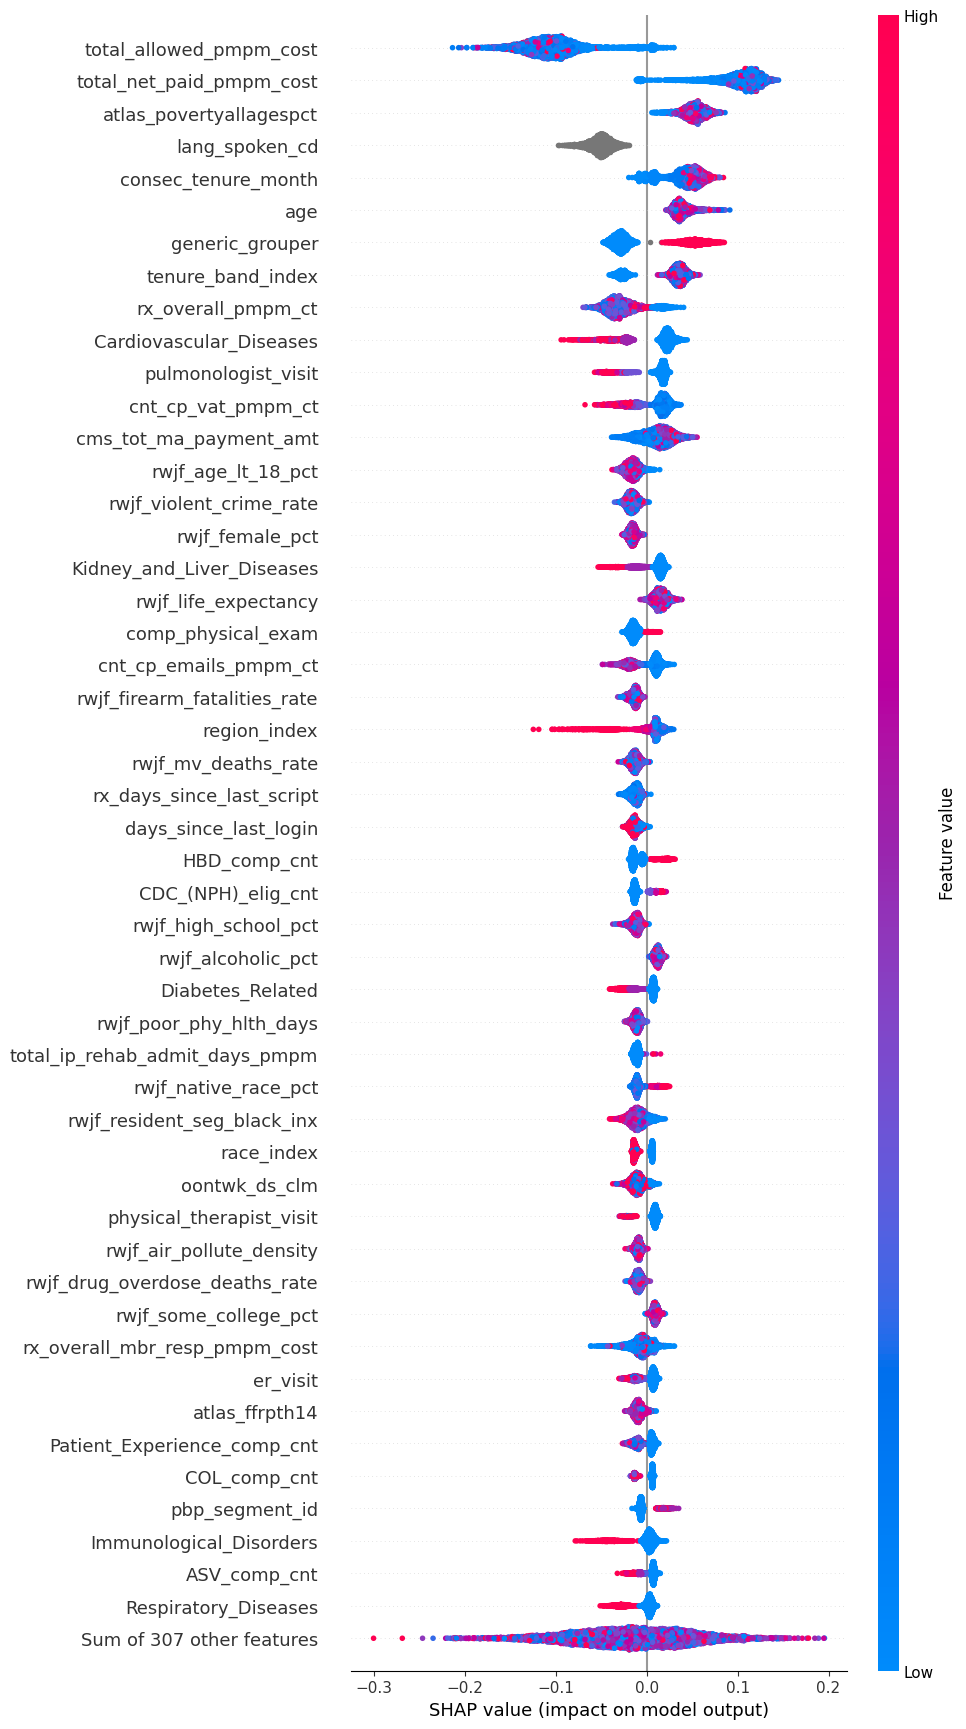

In [95]:
shap.plots.beeswarm(shap_values_adult,max_display=50)

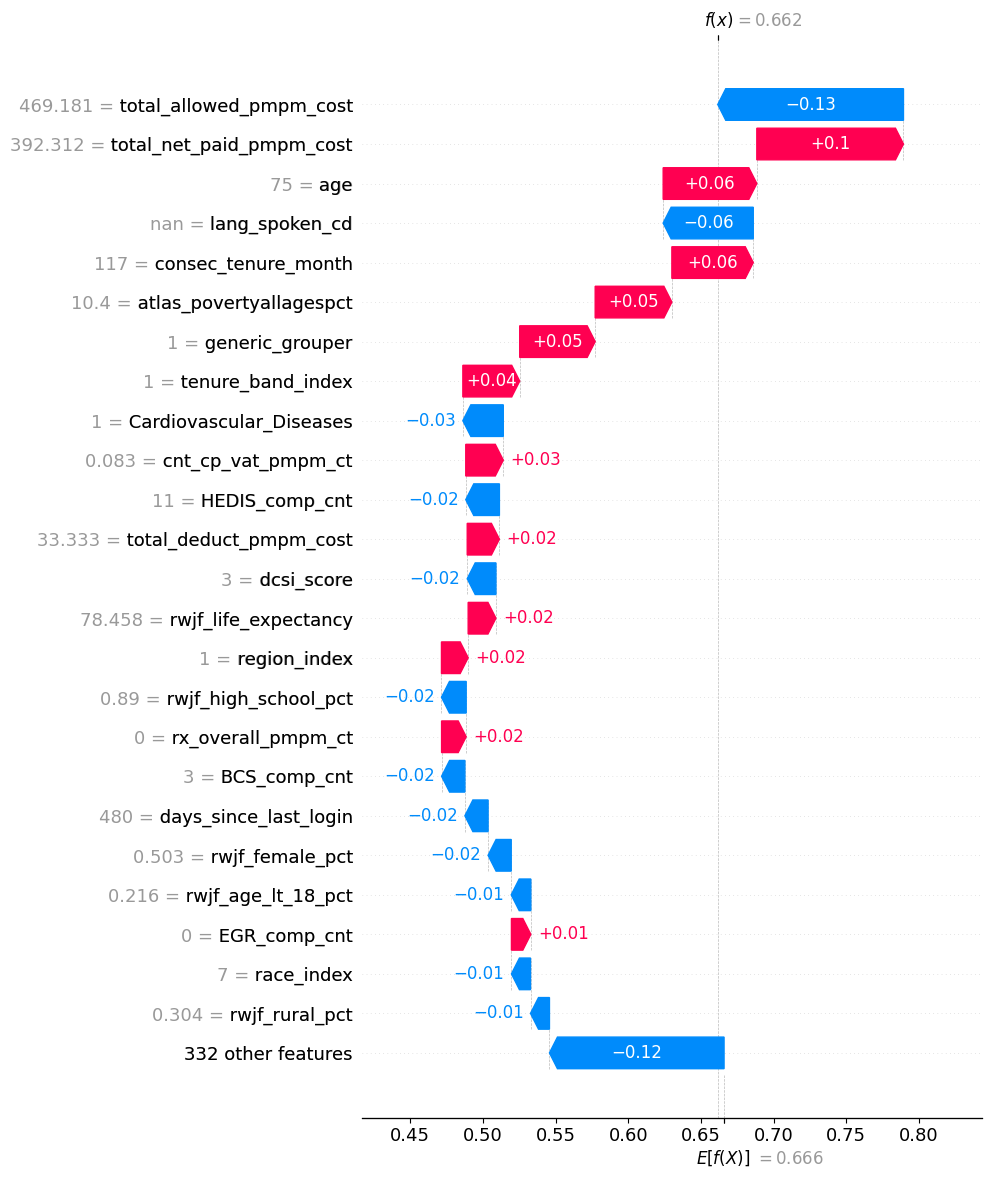

In [115]:
shap.plots.waterfall(shap_values_adult[50], max_display=25)

In [86]:
explain_df_TP=explain_df[(explain_df['predicted']==1)& (explain_df['preventive_visit_gap_ind']==1)][['id']+feature_cols]

In [87]:
explainer_tp=TreeExplainer(single_model,explain_df,model_output='probability')
shap_values_tp = explainer_tp(explain_df_TP.sample(n=5000))

100%|===================| 4988/5000 [04:45<00:00]       

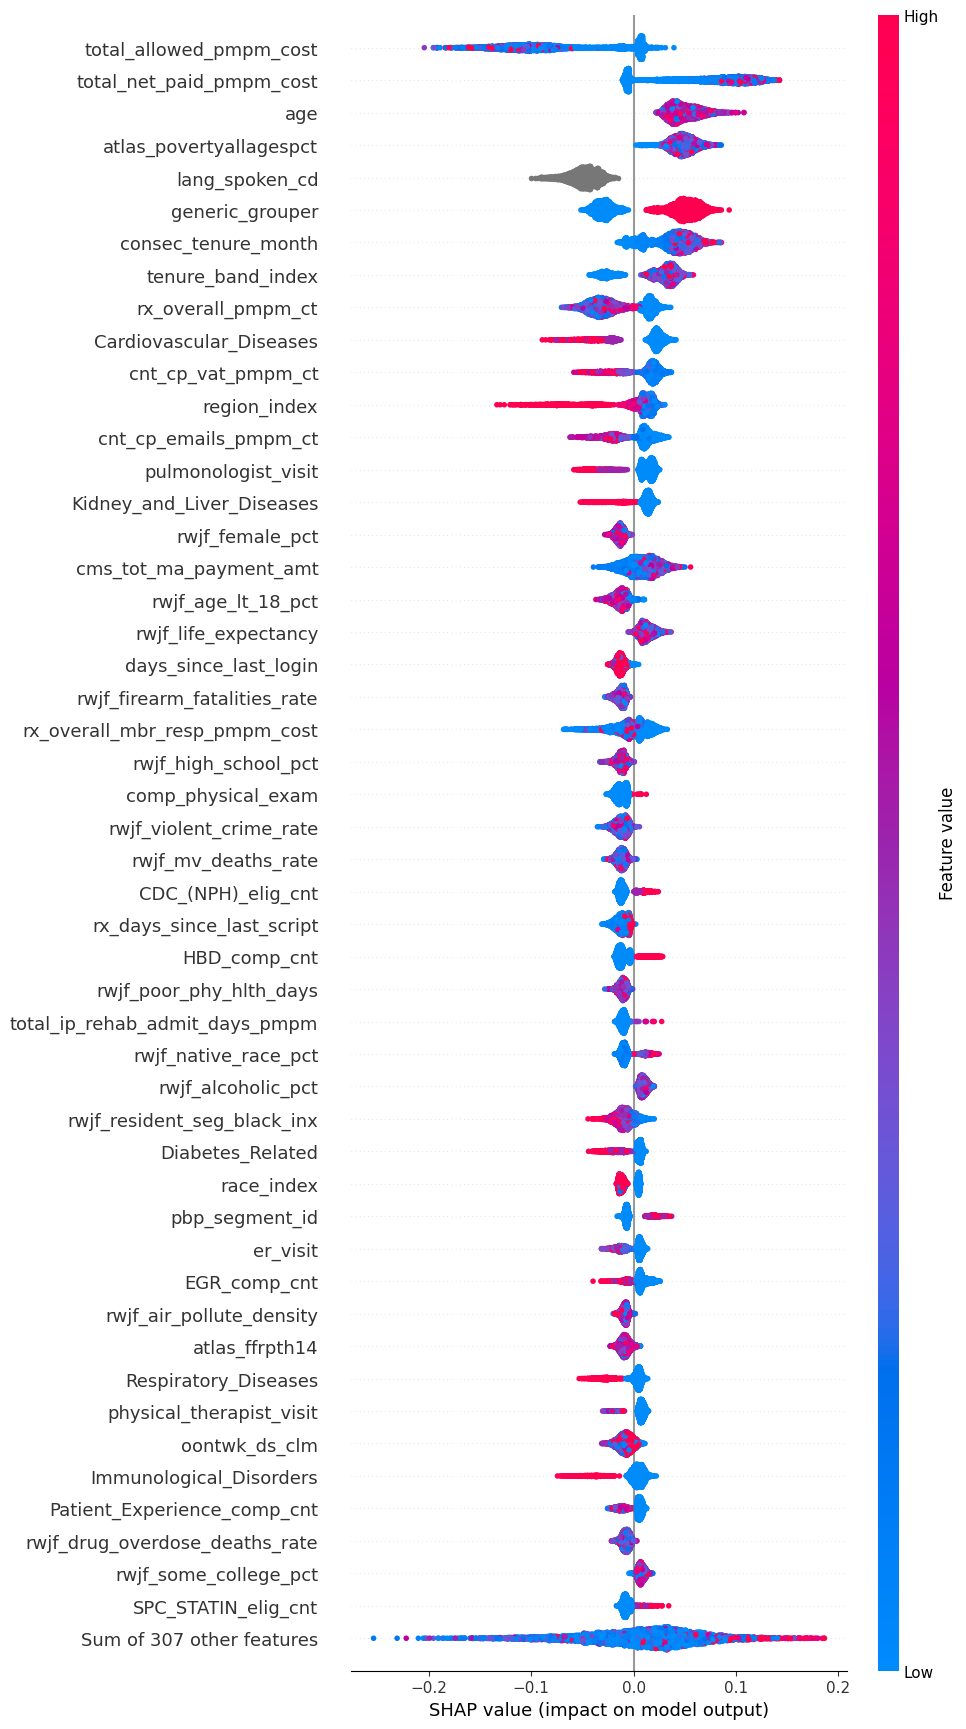

In [91]:
shap.plots.beeswarm(shap_values_tp,max_display=50)

In [42]:
single_model

XGBClassifier(base_score='4.4977063E-1', booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              feature_types=['float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'float',
                             'float', 'float', 'float', 'float', 'fl...
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
feat_imp=pd.DataFrame({'columns':feature_cols,'value':single_model.feature_importances_})

In [38]:
feat_imp_short=feat_imp.loc[feat_imp['value']>0].sort_values(by='value', ascending=False)

In [ ]:
feat_imp_short

In [47]:
len(feature_cols),feat_imp_short.shape

(355, (330, 2))

In [77]:
xgbc_new=xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.1, colsample_bytree=0.9,  tree_method = "hist", device = "cuda", eval_metric='auc', early_stopping_rounds=50 ,
                       colsample_bylevel=0.9,  max_depth=8,reg_lambda=500, reg_alpha=0.8,
              min_child_weight=20,  n_estimators=1300)
xgbc_new.fit(X_train[feature_cols],y_train, eval_set=[(X_val[feature_cols], y_val)])


[0]	validation_0-auc:0.69121
[1]	validation_0-auc:0.69620
[2]	validation_0-auc:0.69942
[3]	validation_0-auc:0.70152
[4]	validation_0-auc:0.70262
[5]	validation_0-auc:0.70389
[6]	validation_0-auc:0.70471
[7]	validation_0-auc:0.70646
[8]	validation_0-auc:0.70767
[9]	validation_0-auc:0.70881
[10]	validation_0-auc:0.70999
[11]	validation_0-auc:0.71204
[12]	validation_0-auc:0.71311
[13]	validation_0-auc:0.71429
[14]	validation_0-auc:0.71565
[15]	validation_0-auc:0.71796
[16]	validation_0-auc:0.71904
[17]	validation_0-auc:0.71984
[18]	validation_0-auc:0.72066
[19]	validation_0-auc:0.72123
[20]	validation_0-auc:0.72184
[21]	validation_0-auc:0.72241
[22]	validation_0-auc:0.72300
[23]	validation_0-auc:0.72378
[24]	validation_0-auc:0.72460
[25]	validation_0-auc:0.72640
[26]	validation_0-auc:0.72710
[27]	validation_0-auc:0.72764
[28]	validation_0-auc:0.72810
[29]	validation_0-auc:0.72868
[30]	validation_0-auc:0.72914
[31]	validation_0-auc:0.72975
[32]	validation_0-auc:0.73019
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9, colsample_bynode=None,
              colsample_bytree=0.9, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=20, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [78]:
xgbc_trian_score_new=xgbc_new.predict_proba(X_train[feature_cols])[:,1][:]
xgbc_val_score_new=xgbc_new.predict_proba(X_val[feature_cols])[:,1][:]
xgbc_test_score_new=xgbc_new.predict_proba(X_test[feature_cols])[:,1][:]

In [84]:

pd.DataFrame({'columns':feature_cols,'values':xgbc_new.feature_importances_}).sort_values(by='values', ascending=False).loc[lambda x: x['columns']=='id']

,columns,values


In [79]:
roc_auc_score(y_train,xgbc_trian_score_new),roc_auc_score(y_val,xgbc_val_score_new), roc_auc_score(y_test,xgbc_test_score_new)

(0.8467536375915451, 0.7727318035242325, 0.7737078763242292)

In [81]:
xgbc=xgb.XGBClassifier(objective='binary:logistic', learning_rate=0.2, colsample_bytree=0.9,  tree_method = "hist", device = "cuda", eval_metric='auc', early_stopping_rounds=50 ,
                       colsample_bylevel=0.7,  max_depth=8,reg_lambda=300, reg_alpha=0.6,
              min_child_weight=None,  n_estimators=1100)
xgbc.fit(X_train[feat_imp_short['columns']],y_train, eval_set=[(X_val[feat_imp_short['columns']], y_val)])

[0]	validation_0-auc:0.68488
[1]	validation_0-auc:0.69554
[2]	validation_0-auc:0.70052
[3]	validation_0-auc:0.70313
[4]	validation_0-auc:0.70822
[5]	validation_0-auc:0.71035
[6]	validation_0-auc:0.71383
[7]	validation_0-auc:0.71547
[8]	validation_0-auc:0.71738
[9]	validation_0-auc:0.71893
[10]	validation_0-auc:0.72070
[11]	validation_0-auc:0.72344
[12]	validation_0-auc:0.72459
[13]	validation_0-auc:0.72574
[14]	validation_0-auc:0.72752
[15]	validation_0-auc:0.72881
[16]	validation_0-auc:0.72955
[17]	validation_0-auc:0.73034
[18]	validation_0-auc:0.73108
[19]	validation_0-auc:0.73212
[20]	validation_0-auc:0.73451
[21]	validation_0-auc:0.73514
[22]	validation_0-auc:0.73590
[23]	validation_0-auc:0.73660
[24]	validation_0-auc:0.73718
[25]	validation_0-auc:0.73822
[26]	validation_0-auc:0.73888
[27]	validation_0-auc:0.74015
[28]	validation_0-auc:0.74064
[29]	validation_0-auc:0.74126
[30]	validation_0-auc:0.74167
[31]	validation_0-auc:0.74295
[32]	validation_0-auc:0.74378
[33]	validation_0-au

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.9, device='cuda', early_stopping_rounds=50,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [82]:
xgbc_trian_score=xgbc.predict_proba(X_train[feat_imp_short['columns']])[:,1][:]
xgbc_val_score=xgbc.predict_proba(X_val[feat_imp_short['columns']])[:,1][:]
xgbc_test_score=xgbc.predict_proba(X_test[feat_imp_short['columns']])[:,1][:]

In [28]:
roc_auc_score(y_train,xgbc_trian_score),roc_auc_score(y_val,xgbc_val_score), roc_auc_score(y_test,xgbc_test_score)

NameError: name 'xgbc_trian_score' is not defined

In [77]:
len(pd.DataFrame({'columns':feat_imp_short['columns'],'values':xgbc.feature_importances_}).sort_values(by='values', ascending=False).loc[lambda x: x['values']>0])

330

In [ ]:
xgbc_single=XGBClassifier(objective='binary:logistic', device='cuda', colsample_bytree=0.9,learning_rate=0.1,max_depth=9,min_child_weight=200,n_estimators=1250,reg_alpha=0.25,reg_lambda=100)
xgbc_single.fit(train_df[feature_cols],train_df['preventive_visit_gap_ind'])